In [ ]:
from google.colab import files
files.upload()  # Upload the `kaggle.json` file

# Move `kaggle.json` to the appropriate directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Set permissions


Saving kaggle.json to kaggle (1).json


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sanidhyak/human-face-emotions")

print("Path to dataset files:", path)

100%|██████████| 80.5M/80.5M [00:00<00:00, 93.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/sanidhyak/human-face-emotions/versions/1


In [ ]:
!ls /root/.cache/kagglehub/datasets/sanidhyak/human-face-emotions/versions/1/data/Happy

05-12-21-happy-people.jpg
10-Habits-of-Happy-People-Seniors-Today.jpg
110754-utyeqqosky-1547658396.jpeg
1_617fd1e2590c2.jpg
170404-happy-workers-feature.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg
220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
2560px-Happy_People.jpg
343515-worldhappinessreport1440.jpg
35438_hd.jpg
427394C200000578-0-image-a-24_1500384481554.jpg
5400ea_cd54b25fdd2a4216819fe49413f0c976mv2.png
56f455011e0000b300705475.jpeg
613k1XcpYCL.jpg
7-principles-of-successful-and-happy-people.png
7VR73K6EP5ETVEOUFANWBUYJEQ.jpg
81Vk4C.jpg
988689_Wallpaper2.jpg
9b65a25adca61c48bcb01370116723e3--happy-people-brings.jpg
afro-girl-enjoying-the-sea-idyll-royalty-free-image-1661186370.jpg
A_Sep20_14_1189155141.jpg
blog-2.jpeg
cess-group-positive-friends-celebrate-victory-achievement-together_1016-9922.jpg
compassion-900x387.jpg
Dollarphotoclub_76084977-1.jpg
Duggar-Family-Secrets-Are-Exposed-in-

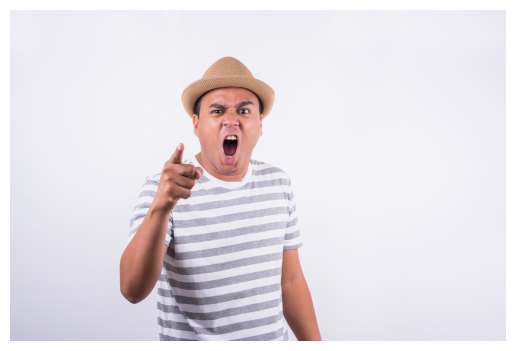

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img_path = "/root/.cache/kagglehub/datasets/sanidhyak/human-face-emotions/versions/1/data/Angry/face-of-an-asian-angry-man-free-photo.jpg"  # Replace with an actual file name
img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops
from cnn_utils import *


%matplotlib inline
np.random.seed(1)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
dataset_path = "/root/.cache/kagglehub/datasets/sanidhyak/human-face-emotions/versions/1/data"

# Create data generators for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Normalize pixel values to [0,1]

# Training generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),  # Resize images to 128x128
    batch_size=270,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=270,
    class_mode='categorical',
    subset='validation'
)

# Display class labels
print("Class indices:", train_generator.class_indices)


Found 212 images belonging to 3 classes.
Found 52 images belonging to 3 classes.
Class indices: {'Angry': 0, 'Happy': 1, 'Sad': 2}


In [ ]:
import matplotlib.pyplot as plt

# Get a batch of training data
X_train, Y_train_all = next(train_generator)
X_test, Y_test_all = next(validation_generator)


In [ ]:
#For now, i'll segregate the dataset to only happy photos

happy_label_index = 1  # Happy is represented by the second column (index 1) in one-hot encoding
happy_indices = np.where(Y_train_all[:, happy_label_index] == 1)[0]  # Find indices where label is 1
happy_indices_test = np.where(Y_test_all[:, happy_label_index] == 1)[0]

# Filter X_train and Y_train to keep only the "happy" images
Y_train=np.zeros((Y_train_all.shape[0],1))
Y_train[happy_indices, 0] = 1
Y_test=np.zeros((Y_test_all.shape[0],1))
Y_test[happy_indices_test, 0] = 1

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 212
number of test examples = 52
X_train shape: (212, 64, 64, 3)
Y_train shape: (212, 1)
X_test shape: (52, 64, 64, 3)
Y_test shape: (52, 1)


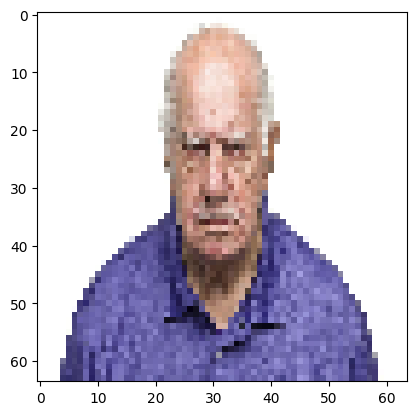

In [ ]:
index = 124
plt.imshow(X_train[index]) #display sample training image
plt.show()

In [ ]:
# GRADED FUNCTION: happyModel

def happyModel():
    """
    Implements the forward propagation for the binary classification model:
    ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code all the values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    None

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """
    model = tf.keras.Sequential([
            ## ZeroPadding2D with padding 3, input shape of 64 x 64 x 3
            tf.keras.layers.ZeroPadding2D(padding=(3,3),input_shape=(64, 64, 3), data_format="channels_last"),

            ## Conv2D with 32 7x7 filters and stride of 1
            tf.keras.layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
            ## BatchNormalization for axis 3
            tf.keras.layers.BatchNormalization(axis = 3, name = 'bn0'),
            ## ReLU
            tf.keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
            ## Max Pooling 2D with default parameters
            tf.keras.layers.MaxPooling2D((2, 2), name='max_pool0'),
            ## Flatten layer
            tf.keras.layers.Flatten(),
            ## Dense layer with 1 unit for output & 'sigmoid' activation
            tf.keras.layers.Dense(1, activation='sigmoid', name='fc'),

        ])

    return model

In [ ]:
happy_model = happyModel()
happy_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/zero_padding2d.py:72: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
happy_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d (ZeroPadding2D)       │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv0 (Conv2D)                       │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn0 (BatchNormalization)             │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool0 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc (Dense)                           │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

In [ ]:
happy_model.fit(X_train, Y_train, epochs=2, batch_size=16)

Epoch 1/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.5526 - loss: 2.2581
Epoch 2/2
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.6891 - loss: 1.0845


In [ ]:
happy_model.evaluate(X_test, Y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6290 - loss: 0.8369 


[0.8745988607406616, 0.6153846383094788]

In [ ]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train_all.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test_all.shape))

number of training examples = 212
number of test examples = 52
X_train shape: (212, 64, 64, 3)
Y_train shape: (212, 3)
X_test shape: (52, 64, 64, 3)
Y_test shape: (52, 3)


In [ ]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE

    Note that for simplicity and grading purposes, you'll hard-code some values
    such as the stride and kernel (filter) sizes.
    Normally, functions should take these values as function parameters.

    Arguments:
    input_img -- input dataset, of shape (input_shape)

    Returns:
    model -- TF Keras model (object containing the information for the entire training process)
    """

    input_img = tf.keras.Input(shape=input_shape)
    ## CONV2D: 8 filters 4x4, stride of 1, padding 'SAME'
    # Z1 = None
    ## RELU
    # A1 = None
    ## MAXPOOL: window 8x8, stride 8, padding 'SAME'
    # P1 = None
    ## CONV2D: 16 filters 2x2, stride 1, padding 'SAME'
    # Z2 = None
    ## RELU
    # A2 = None
    ## MAXPOOL: window 4x4, stride 4, padding 'SAME'
    # P2 = None
    ## FLATTEN
    # F = None
    ## Dense layer
    ## 6 neurons in output layer. Hint: one of the arguments should be "activation='softmax'"
    # outputs = None
    # YOUR CODE STARTS HERE
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=3, activation='softmax')(F)

    # YOUR CODE ENDS HERE
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [ ]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

output = [['InputLayer', [(None, 64, 64, 3)], 0],
        ['Conv2D', (None, 64, 64, 8), 392, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 64, 64, 8), 0],
        ['MaxPooling2D', (None, 8, 8, 8), 0, (8, 8), (8, 8), 'same'],
        ['Conv2D', (None, 8, 8, 16), 528, 'same', 'linear', 'GlorotUniform'],
        ['ReLU', (None, 8, 8, 16), 0],
        ['MaxPooling2D', (None, 2, 2, 16), 0, (4, 4), (4, 4), 'same'],
        ['Flatten', (None, 64), 0],
        ['Dense', (None, 3), 390, 'softmax']]


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,115 (4.36 KB)

 Trainable params: 1,115 (4.36 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train_all)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test_all)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step - accuracy: 0.3105 - loss: 1.2035 - val_accuracy: 0.2885 - val_loss: 1.1517
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.3093 - loss: 1.1390 - val_accuracy: 0.3654 - val_loss: 1.1153
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 169ms/step - accuracy: 0.3079 - loss: 1.1155 - val_accuracy: 0.3654 - val_loss: 1.1007
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.3333 - loss: 1.1054 - val_accuracy: 0.3846 - val_loss: 1.0930
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.3530 - loss: 1.0999 - val_accuracy: 0.3846 - val_loss: 1.0871
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.3530 - loss: 1.0966 - val_accuracy: 0.3846 - val_loss: 1.0823
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.3530 - loss: 1.0945 - val_accuracy: 0.3846 - val_loss: 1.0779
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3530 - loss: 1.0920 - val_accuracy: 0.3846 - val

In [ ]:
history.history

{'accuracy': [0.2971698045730591,
  0.30188679695129395,
  0.349056601524353,
  0.36320754885673523,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.37735849618911743,
  0.3820754587650299,
  0.3820754587650299,
  0.3820754587650299,
  0.3820754587650299,
  0.38679245114326477,
  0.38679245114326477,
  0.38679245114326477,
  0.39150944352149963,
  0.3962264060974121,
  0.400943398475647,
  0.4103773534297943,
  0.41981130838394165,
  0.43396225571632385,
  0.4433962404727936,
  0.4386792480945587,
  0.4575471580028534,
  0.4575471580028534,
  0.4669811427593231,
  0.4716981053352356,
  0.49528300762176514,
  0.5094339847564697,
  0.5330188870429993,
  0.5330188870429993,
  0.5424528121948242,
  0.5424528121948242,
  0.5424528121948242,
  0.5424528121948242,
  0.5424528121948242,
  0.5471698045730591,
  0.551886796951294,
  0.

<ipython-input-22-957c1ea044b0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
<ipython-input-22-957c1ea044b0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

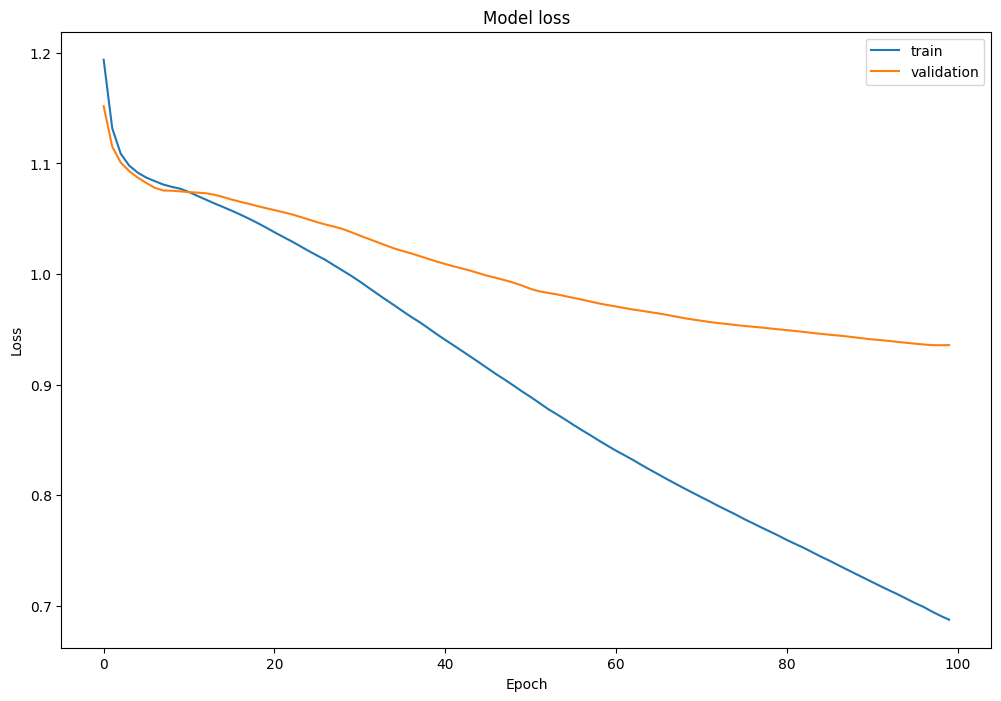

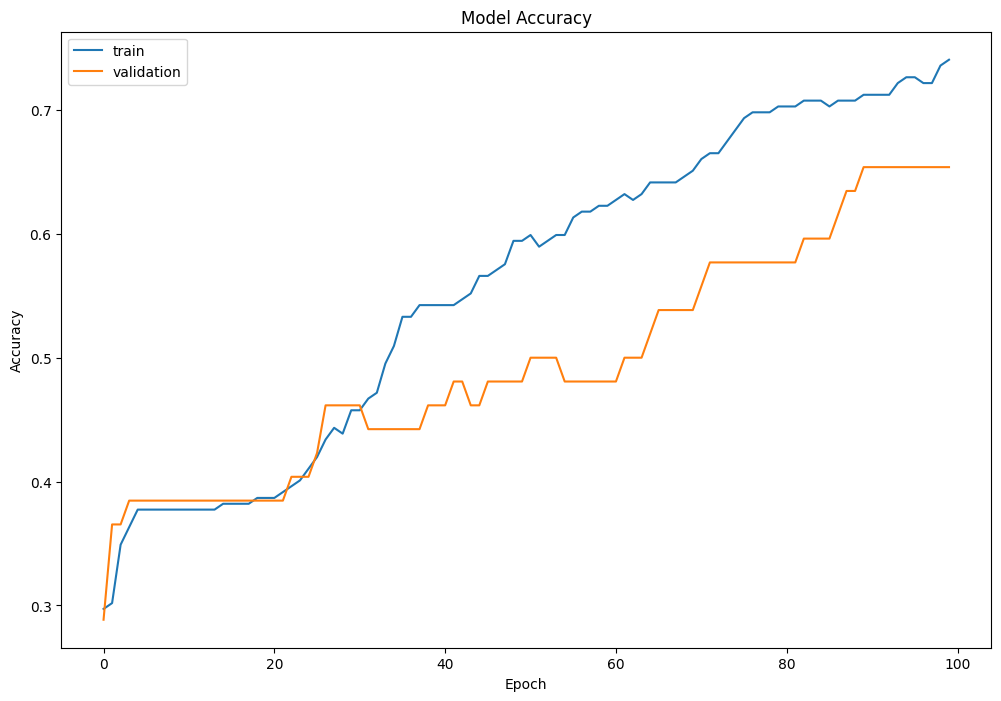

In [ ]:
# The history.history["loss"] entry is a dictionary with as many values as epochs that the
# model was trained on.
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(12,8)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(12,8)).set(xlabel='Epoch',ylabel='Accuracy')